In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0', 'UTC'])

In [4]:
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [5]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [6]:
for i in df.columns:
    
    df[i] = df[i].fillna(df[i].mean())

In [7]:
df.head(2)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,16941,3283,0,0,543,461,2093,0,0,0,0,0,0,0
1,16954,3214,0,0,565,509,2102,0,0,0,0,0,1,0


In [8]:
X = df[df.columns[:-1]]
y = df['FireAlarm']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Decision Tree

[[1778    0]
 [   0 4485]]


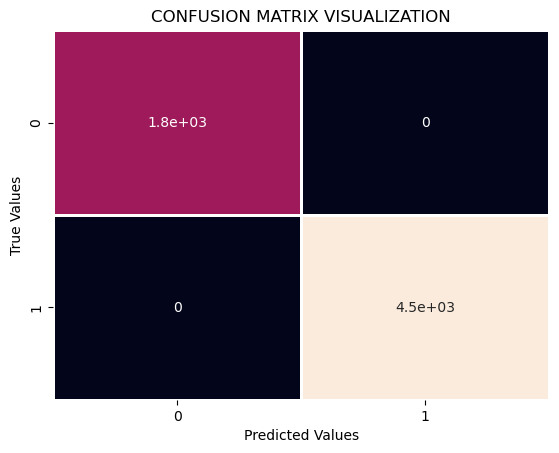

In [10]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")

# Save as PNG
plt.savefig("confusion_matrix.png", bbox_inches="tight")

# Save as PDF
plt.savefig("confusion_matrix.pdf", bbox_inches="tight")

# Show the visualization (optional)
plt.show()

In [11]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1778
           1       1.00      1.00      1.00      4485

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [13]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:
[[1749   15]
 [  54 4445]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1764
           1       1.00      0.99      0.99      4499

    accuracy                           0.99      6263
   macro avg       0.98      0.99      0.99      6263
weighted avg       0.99      0.99      0.99      6263



D:\snakes\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Lets Try Multiple Models in a Loop

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc


In [26]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier(),
    MLPClassifier()
]

In [27]:
from sklearn.metrics import roc_auc_score


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")


Model: LogisticRegression
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1 Score: 0.99
ROC-AUC: 0.99
Confusion Matrix:
[[1749   15]
 [  54 4445]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1764
           1       1.00      0.99      0.99      4499

    accuracy                           0.99      6263
   macro avg       0.98      0.99      0.99      6263
weighted avg       0.99      0.99      0.99      6263



Model: DecisionTreeClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[1764    0]
 [   0 4499]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1764
           1       1.00      1.00      1.00      4499

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



Mode

ValueError: feature_names must be string, and may not contain [, ] or <

# Some more Models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

In [29]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000),
    VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ]),
    StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())
])



In [30]:

with open("warnings.log", "w"):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)



ValueError: feature_names must be string, and may not contain [, ] or <

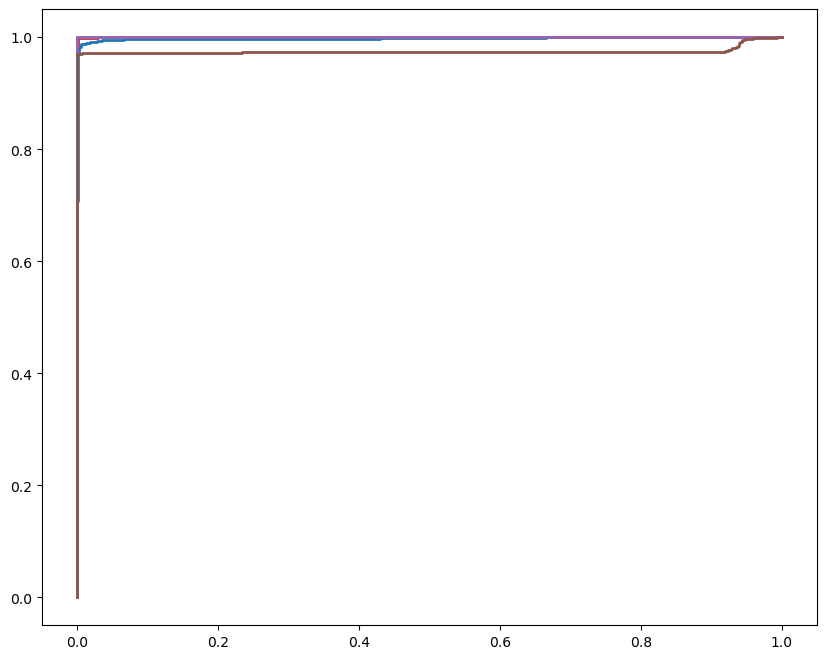

In [31]:
roc_data = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    # Fit the XGBClassifier without specifying feature_names
    model.fit(X_train, y_train)

    
    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict directly
        if hasattr(model, "decision_function"):
            y_pred_prob = model.decision_function(X_test)
        else:
            y_pred_prob = model.predict(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [32]:
import evalml

ModuleNotFoundError: No module named 'evalml'